# Spine Model


In [1]:
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True
import pickle

import PS_lib as lb
import PS_storage as st
from bootstrap import btset_cd, generateplots


# Parameter definitions
# Data is stored here      
data = st.dataStorage() # some default parameters defined.
data.dt = 0.05
data.NMDA = False

# Definition of the model.
lb.h.dt = data.dt
NMDA = data.NMDA
model = lb.loadNeuron("Basic2.hoc",axon=False)

# Adding piece of dendritic branch with spine
model.addDend(name="DendE",locus="dendA1",L=4.0,D=1.5,ilocus=1)
model.addSpne(locus="DendE",ilocus=0.5,L=1.0,D=1.0,Lneck=1.0,Dneck=0.15)
# Temperature of the neuron
lb.h.celsius = model.temperature
model.addDend(name="DendN",locus=3,L=240.0,D=0.5,ilocus=1)
data.model = model.__dict__

model.soma.L = 20
model.dend[-1].L = 200
model.dend[-1].diam = 10
print(model.soma.L,model.soma.diam,model.soma(0.5).area(),model.dend[-1](0.5).area())

print("Topology:")
print(lb.h.topology())


	0 
	1 
	1 
	1 
	1 
20.0 29.78380012512207 1871.3713533814052 6283.185307179586
Topology:

|-|       soma(0-1)
   `|       dendA1c(0-1)
     `|       dendA1(0-1)
       `|       DendE(0-1)
         `|       DendN(0-1)
        `|       NSpne000(0-1)
          `|       Spne000(0-1)
   `|       dendB1(0-1)

1.0


In [6]:
#with open("data_Fullset/Fullset.pkl","rb") as f:
#    data = pickle.load(f)
    
dataf = {
"inh shaft": (-2.01288, 0.606754),
"SiS": {
"Dss": (248, 1.0),
"Vh": (-2.84134 , 0.943684),
"A1": (-0.2329858,0.41,1.0),
"Ah": (-0.9274113,1.32,0.66666666667),
"Rh":  (1.92772, 0.604723),
"Rn":(4.03436, 1.00208)
},
"DiS": {
"Dss": (248, 1.0),
"Vh": (-2.0554,0.742202),
"A1": (-0.2329858,0.41,1.0),
"Ah": (-0.9274113,1.32,0.66666666667),
"Rh": (1.59667,0.436302),  
"Rn": (3.89941,1.13159),
"A2": ( -2.54262,0.531551)
},
}

### Recording places

We set recording vectors in all dendritic compartments, spine included

In [7]:
nsp = 500
dis = btset_cd(cd='DiS',size=nsp)
sis = btset_cd(cd='SiS',size=nsp)
sps = btset_cd(cd='Sp',size=nsp)

#generateplots(dis,corplot=True)

Text(0.5, 0, 'iPSD shaft ($\\mu m^2$)')

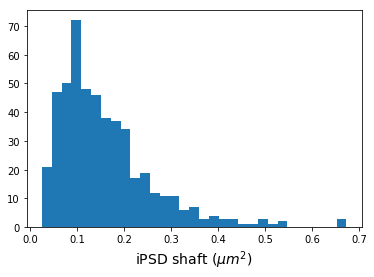

In [8]:
nsp = 500
p = dataf["inh shaft"]
iPSDsh = exp(randn(nsp)*p[1]+p[0])
iPSDsh = exp(randn(nsp)*p[1]+p[0])
figure()
h = hist(iPSDsh,31)
xlabel("iPSD shaft ($\mu m^2$)",fontsize=14)


In [9]:

rhGABAR = 500 # Receptors/um2
rhAMPAR = 1000 # Receptors/um2
rhNMDAR = 10 # Receptors/um2

gtrG = rhGABAR*30e-6*2/5.0
gtrA = rhAMPAR*11e-6*2/5.0
gtrN = rhNMDAR*30e-6/16.0

figureplot=False
if figureplot:
    fig, ax = subplots(nrows=1,ncols=4,figsize=(20,5))
    fig.suptitle("Number of Receptors",fontsize = 20)

    ax[0].hist(sis['A1']*rhAMPAR,31)
    ax[0].set_xlabel("#AMPAR in Sis")
    ax[1].hist(dis['A1']*rhAMPAR,31)
    ax[1].set_xlabel("#AMPAR in Dis")
    ax[2].hist(dis['A2']*rhGABAR,31)
    ax[2].set_xlabel("#GABAAR in Dis")
    ax[3].hist(iPSDsh*rhGABAR,31)
    ax[3].set_xlabel("#GABAAR in shaft")

    fig, ax = subplots(nrows=1,ncols=4,figsize=(20,5))
    fig.suptitle("Max Current",fontsize = 20)


    ax[0].hist(sis['A1']*gtrA/1e-6,31)
    ax[0].set_xlabel("I$_{max}$ (pA)")
    ax[1].hist(dis['A1']*gtrA/1e-6,31)
    ax[1].set_xlabel("I$_{max}$ (pA)")
    ax[2].hist(dis['A2']*gtrG/1e-6,31)
    ax[2].set_xlabel("I$_{max}$ (pA)")
    ax[3].hist(iPSDsh*gtrG/1e-6,31)
    ax[3].set_xlabel("I$_{max}$ (pA)")
    #savefig("D_maxI.png",bbox_inches='tight',pad_inches = 0)


In [10]:

#def fx(Dmax,V):
#    xx = Dmax
#    yy = sqrt(4*V/Dmax/pi)
#    return(array([xx,yy]))
##                 L  D
#
#spn = dis
#spn["D"] = zeros(nsp)
#spn["L"] = zeros(nsp)
#spn["AhA0"] = zeros(nsp)

#for i in arange(nsp):
#    Ah = spn["Ah"][i]
#    Vh = spn["Vh"][i]
#    Dmax = spn["maxDhead"][i]/1e3
#
#    L,D = fx(Dmax,Vh)
#    spn["D"][i] = D
#    spn["L"][i] = L
#    spn['AhA0'][i] = Ah/(D*pi*L)
#    #
#
#spn = sis
#spn["D"] = zeros(nsp)
#spn["L"] = zeros(nsp)
#spn["AhA0"] = zeros(nsp)

#for i in arange(nsp):
#    Ah = spn["Ah"][i]
#    Vh = spn["Vh"][i]    
#    Dmax = spn["maxDhead"][i]/1e3#

#    L,D = fx(Dmax,Vh)
#    spn["D"][i] = D
#    spn["L"][i] = L
#    spn['AhA0'][i] = Ah/(D*pi*L)


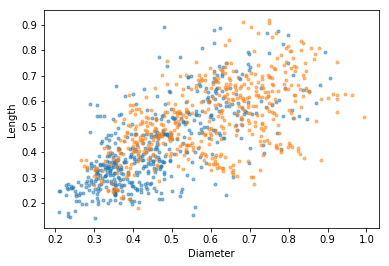

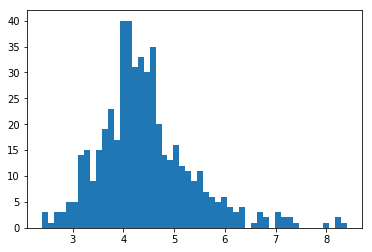

In [11]:
figureplot=True
if figureplot:
    spn = sis
    plot(spn['D'],spn['L'],'.',alpha=0.5)
    spn = dis
    plot(spn['D'],spn['L'],'.',alpha=0.5)
    xlabel("Diameter")
    ylabel('Length')

    #figure()
    #plot(spn['D']**2*pi*spn['L']/4,spn['Vh'],'.')
    figure()
    hist(spn['Ah']/(spn['D']*pi*spn['L']),51)

In [12]:
for dend in model.dend:
    print(dend.L,dend.diam)

1.0 1.5
200.24984394500785 1.5000000000000002
50.15974481593781 1.5
4.0 1.5
200.0 10.0


In [13]:
sp = model.spne[0]
print(sp(0.5).area(),sp(0.5).volume(),sp.diam*sp.L*pi,sp.diam**2*sp.L*pi/4.0)

sp.L = dis["L"][0]
sp.diam = dis["D"][0]
print("Area Volume Ah Vh")
print(sp(0.5).area(),sp(0.5).volume(),dis["Ah"][0]/dis["AhA0"][0],dis["Vh"][0])


3.141592653589793 0.7853981633974483 3.141592653589793 0.7853981633974483
Area Volume Ah Vh
0.8381525649151899 0.09062862386844604 0.8381525649151897 0.09062862386844603


### Excitatory synapse 

We need to define the arrival time and dynamics. These parameters may be modified later

In [14]:
lb.init_active(model, axon=False, soma=False, dend=False, dendNa=False,
                dendCa=False,spne=True)

In [15]:
model.AMPAlist = []
model.ncAMPAlist = []

AMPA = lb.h.Exp2Syn(1,sec = model.spne[0])
tau1  = 0.5
tau2 = 3.0
AMPA.tau1 = tau1
AMPA.tau2 = tau2

nampa = 50
gmax = 15*nampa/1e6
stimE=lb.h.NetStim();stimE.number = 1; 
NC = lb.h.NetCon(stimE,AMPA,0,0,gmax)

model.AMPAlist.append(AMPA)
model.ncAMPAlist.append(NC)
NC.delay = 10

# NMDA part
nnmda = 2
gmaxN = 50*nnmda/1e6
lb.add_NMDAsyns(model, locs=[[0,0.5]], gmax=gmaxN,tau2=20.0)  
NMDA = model.NMDAlist[0]
NCN = model.ncNMDAlist[0]
stimN=lb.h.NetStim();stimN.number = 1;
NCN = lb.h.NetCon(stimN,NMDA,0,0,gmaxN)
model.ncNMDAlist[0] = NCN
NMDA.tau1 = 2.0
NMDA.tau2 = 30.0


### Inhibitory synapse

In [16]:
nGABA = 35
gmaxG = nGABA*30e-6
lb.add_GABAsyns(model, locs=[[0,1]], spne=True, gmax=gmaxG,tau1=1.5,tau2=15.0)  
GABA = model.GABAlist[0]
NCG = model.ncGABAlist[0]
stimG=lb.h.NetStim();stimG.number = 1;
NCG = lb.h.NetCon(stimG,GABA,0,0,gmaxG)
model.ncGABAlist[0] = NCG

In [17]:
trec, vrec = lb.h.Vector(), lb.h.Vector()
gRec, iRec,  vspneRec = [], [], []
gNMDA_rec, iNMDA_rec = [], []
trec.record(lb.h._ref_t)
vrec.record(model.soma(0.5)._ref_v)


#n=0
vDendRec = []
caDendRec = []
#For all dendrites
for dend in model.dend:
    #Adding vectors for Voltage, and Calcium
    vDendRec.append(lb.h.Vector())
    caDendRec.append(lb.h.Vector())
    # Placing recording at mid-point in the dendritic branch
    vDendRec[-1].record(dend(0.5)._ref_v)
    # NO CALCIUM!?!?!
#Probably better to organize them in a dictionary        
vDendRec[1].record(model.dend[1](1.0)._ref_v)

# Spine voltage recording stuff
vspneRec.append(lb.h.Vector())
vspneRec.append(lb.h.Vector())
sp = model.spne[0]
vspneRec[0].record(sp(0.5)._ref_v)
sp = model.neck[0]
vspneRec[1].record(sp(0.5)._ref_v)

# Calcim

caDendRec = []
sp = model.spne[0]
caDendRec.append(lb.h.Vector())
caDendRec.append(lb.h.Vector())
caDendRec.append(lb.h.Vector())
caDendRec[0].record(sp(0.5)._ref_ical) 
caDendRec[1].record(model.NMDAlist[0]._ref_i)
caDendRec[2].record(sp(1.0)._ref_cai) 


Vector[16]

In [18]:
vDendEL = []
dend = model.dend[1]
for i in range(10):
    vDendEL.append(lb.h.Vector())
    vDendEL[-1].record(dend((i+1.0)/10.0)._ref_v)

In [19]:
vDendEL2 = []
dend = model.dend[-1]
for i in range(10):
    vDendEL2.append(lb.h.Vector())
    vDendEL2[-1].record(dend((i+1.0)/10.0)._ref_v)

In [20]:
model.dend

[dendA1c, dendA1, dendB1, DendE, DendN]

In [21]:
iRec.append(lb.h.Vector())
iRec.append(lb.h.Vector())
currentAMPA = iRec[0]
currentGABA = iRec[1]

In [22]:
currentAMPA.record(AMPA._ref_i)
currentGABA.record(GABA._ref_i)

Vector[38]

In [23]:
dendsizeL0 = 10
dendsizeL = max(max(max(dis['Dss'])+10,max(sis['Dss'])+10),178)
neck = model.neck[0]
Rneck = neck.L*1e-6/(neck.diam*1e-6/2.0)**2/pi*neck.Ra/100
dend = model.dend[0]
dend.L = dendsizeL0
dend.diam = 1.0
print(dend.L,dend.diam)
Rdend = dend.L*1e-6/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
Rdendf = Rdend
dend = model.dend[1]
dendc = model.dend[1]
dendc.L = dendsizeL
dend.diam = 0.5
print(dend.L,dend.diam,Rdend/1e6)
Rdend +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
dend = model.dend[-1]
dend.diam = 0.5
dendsh = model.dend[-1]
dend.L = 1
print(dend.L,dend.diam,Rdend/1e6)
Rdend +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
Rdendf +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
print("The resistance of neck and the dendritic impedance are %.2f and %2.f MΩ (resp.)" %(Rneck/1e6,Rdend/1e6))

10.0 1.0
178.0 0.5 31.830988618379067
1.0 0.5 1165.014183432674
The resistance of neck and the dendritic impedance are 141.47 and 1171 MΩ (resp.)


In [24]:
#model.soma.diam = model.soma.L
dendN = model.dend[-1]
dendN.L = 1

In [25]:
dendsh.diam = 0.5
dendc.diam = 0.5
dendN.diam = 0.5        

In [26]:
rhosp = 1.3
dendareaperL = rhosp*mean(sps['Ah'])+(pi*0.5)
factor = dendareaperL/(pi*0.5)
print(factor)
dendN.cm = 3.5
dendc.cm = 3.5

3.6579425962103955


In [27]:
dendc.nseg = int(dendc.L//10)+1
dendN.nseg = int(dendN.L//10)+1

dendc.nseg = 100
dendN.nseg = 100
print(dendc.nseg,dendN.nseg)

100 100


## Plots

xkcd is to give it non serious appearance

In [28]:
gtrG = rhGABAR*30e-6*2/5.0
gtrA = rhAMPAR*11e-6*3/5.0
gtrN = rhNMDAR*30e-6*1.0/16.0/4.0/1.27

In [29]:
mean(spn["A1"][:])*rhNMDAR

2.3358003708047774

In [30]:
diam0 = 0.15
Rneck0 = Rneck/1e6
Cm0 = model.CM
print(Rneck0)

141.4710605261292


In [31]:
dendsh.L+dendc.L+dendN.L

180.0

In [32]:
mean(gtrA*spn["A1"][:])/1e-3

1.541628244731153

In [33]:
Rneck = neck.Ra*neck.L/(neck.diam)**2*0.04/pi
print(Rneck)

141.4710605261292


In [34]:
min(sps['Ln'])

0.2115850069217095

In [35]:
sps['Dss'][isnan(sps['Dss'])]

Series([], Name: Dss, dtype: float64)

In [36]:
sps['Ln'][isnan(sps['Ln'])]

Series([], Name: Ln, dtype: float64)

In [37]:

def simulateSet(model,spn,tG = 500,ton = 50,toffset = 50,t_stop = 250, EL = -65,btsr = None):
    if btsr is None:
        btsr = ones(9)==0
    model.E_PAS = EL
    model.soma.e_pas = model.E_PAS
    for dendp in model.dend:
        dendp.e_pas = model.E_PAS
    for sp in model.spne:
        sp.e_pas = model.E_PAS

    dendsh = model.dend[-2]
    dendc = model.dend[1]
    dendN = model.dend[-1]
    neck = model.neck[0]
    sp = model.spne[0]
    dshL = dendsh.L
    dendsizeL = dendsh.L+dendc.L+dendN.L
    data = column_stack((spn["A1"],spn["A1"],spn["A2"],spn["Rneck"],spn["Dss"],spn["L"],spn["D"],spn["Ln"],spn["AhA0"]))
    for i in range(9):
        if ~btsr[i]:
            data[:,i] = data[:,i].mean()
            
    mes = zeros((nsp,9))
    me2 = zeros((nsp,11))
    me3 = zeros((nsp,10))

    vavg = zeros((int(t_stop/lb.h.dt+1),7))
    vtracs = zeros((int(t_stop/lb.h.dt+1),500))
    Ctracs = zeros((int(t_stop/lb.h.dt+1),500))
    vtracsD = zeros((int(t_stop/lb.h.dt+1),500))
    vtracsS = zeros((int(t_stop/lb.h.dt+1),500))
    for i in arange(nsp):
        NC.weight[0]  = data[i,0] *gtrA#/2
        NCN.weight[0] = data[i,1] *gtrN#*0#*0
        NCG.weight[0] = data[i,2] *gtrG#*0
        
        neck.L = data[i,7]  
        Rneck0 = neck.Ra*neck.L/(diam0)**2*0.04/pi
        #print(Rneck0,data[i,3])
        neck.diam = diam0*sqrt(Rneck0/data[i,3])
        
        posD = data[i,4]
        
        dendc.L = posD-dshL/2
        dendN.L = dendsizeL-posD-dshL/2

        
        # A = pi*D**2
        sp.L = data[i,5]
        sp.diam = data[i,6]
        sp.cm = data[i,8]
        spvol = sp(0.5).volume()
        spineArea =  sp(0.5).area()#sp.L*sp.diam+1.8*sp.diam**2/4 # um^2
        
        CaTcond = 2e6# pS
        #sp.gbar_itL = 0.0*0.15*CaTcond/spineArea*1e-10
        #sp.gbar_ca = 1.0*100*CaTcond/spineArea*1e-10
        #sp.gbar_it = 0.0*0.15*CaTcond/spineArea*1e-10
        
        NC.delay = toffset+ton-50
        NCN.delay = toffset+ton-50
        NCG.delay = toffset+tG#-50

        for il in range(10):
            f = 1-7.5*il/dendc.L
            #f = 0.5
            if f>=0:
                vDendEL[il].record(dendc(f)._ref_v)
            else:
                vDendEL[il].record(dendc(0.0)._ref_v)
        
        for il in range(10):
            f = 7.5*il/dendc.L
            #f = 0.5
            if f<=1:
                vDendEL2[il].record(dendN(f)._ref_v)
            else:
                vDendEL2[il].record(dendN(1.0)._ref_v)
                
        lb.h.finitialize(model.E_PAS)
        
        

                    
        #print(data[i,:])
        lb.neuron.run(t_stop)
        
        #plot(trec,vspneRec[0])    
        
        current = abs((array(vDendRec[1])-array(vrec[0]))/Rdend)
        
        vtracs[:,i] = array(vspneRec[0]) 
        vtracsD[:,i] = array(vDendRec[1])
        #vtracsD[:,i] = array(vDendEL[0])
        vtracsS[:,i] = array(vrec) 

        vavg[:,0] += array(vspneRec[0]) 
        vavg[:,1] += array(vspneRec[0])**2
        vavg[:,2] += array(vDendRec[1]) 
        vavg[:,3] += array(vDendRec[1])**2
        vavg[:,4] += array(vrec) 
        vavg[:,5] += array(vrec)**2
        vavg[:,6] += 1
            
        cat = array(caDendRec[-1])/1e-3
        Ctracs[:,i] = cat-cat[0] 
        aG = abs(array(currentGABA)).argmax()
        aA = abs(array(currentAMPA)).argmax()
        
        mes[i,:] = [data[i,3],max(vspneRec[0]),max(vDendRec[3]),max(vrec),max(cat)-cat[0],array(currentGABA)[aG],array(currentAMPA)[aA],spvol,max(current)]
        me2[i,0] = max(vDendRec[3])
        me2[i,1:] = [max(vD) for vD in vDendEL]
        me3[i,:] = [max(vD) for vD in vDendEL2]

        #plot(trec,array(caDendRec[-1])/1e-3)
        #ylabel("[Ca] (uM)")
        #figure()
        #plot(trec,vspneRec[0])
        #break
        
    vavg[:,:5] = vavg[:,:5]/vavg[0,6]
    vavg[:,1] = sqrt(vavg[:,1]-vavg[:,0]**2)#/sqrt(vavg[0,6])
    vavg[:,3] = sqrt(vavg[:,3]-vavg[:,2]**2)#/sqrt(vavg[0,6])
    vavg[:,5] = sqrt(vavg[:,5]-vavg[:,4]**2)#/sqrt(vavg[0,6])
    return(vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3)

In [38]:
#vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = simulateSet(model,sps,tG = 500,ton = 50,toffset = 50,t_stop = 250, EL = -65,btsr = ones(9)==0)

In [41]:
sp.insert('caq'); sp.pcaqbar_caq = 6.0e-6 
#sp.insert('can'); sp.pbar_can = 1.0e-5      
# (HVA) L - type
#sp.insert('caL'); sp.pbar_caL = 6.7e-6      
# (Cav1.3) L - type
#sp.insert('caL13'); sp.pcaLbar_caL13 = 1.7e-6

In [ ]:
spn = sps
btsr = ones(9)==0
t_stop = 1000
EL = -65
model.E_PAS = EL
model.soma.e_pas = model.E_PAS
for dendp in model.dend:
    dendp.e_pas = model.E_PAS
for sp in model.spne:
    sp.e_pas = model.E_PAS

dendsh = model.dend[-2]
dendc = model.dend[1]
dendN = model.dend[-1]
neck = model.neck[0]
sp = model.spne[0]
dshL = dendsh.L
dendsizeL = dendsh.L+dendc.L+dendN.L
data = column_stack((spn["A1"],spn["A1"],spn["A2"],spn["Rneck"],spn["Dss"],spn["L"],spn["D"],spn["Ln"],spn["AhA0"]))
for i in range(9):
    if ~btsr[i]:
        data[:,i] = data[:,i].mean()

mes = zeros((nsp,9))
me2 = zeros((nsp,11))
me3 = zeros((nsp,10))

vavg = zeros((int(t_stop/lb.h.dt+1),7))
vtracs = zeros((int(t_stop/lb.h.dt+1),500))
Ctracs = zeros((int(t_stop/lb.h.dt+1),500))
vtracsD = zeros((int(t_stop/lb.h.dt+1),500))
vtracsS = zeros((int(t_stop/lb.h.dt+1),500))


i = 0    
toffset = 50
ton = 10
tG = 500
NC.weight[0]  = data[i,0] *gtrA#/2
NCN.weight[0] = data[i,1] *gtrN#*0#*0
NCG.weight[0] = data[i,2] *gtrG#*0

neck.L = data[i,7]  
Rneck0 = neck.Ra*neck.L/(diam0)**2*0.04/pi
#print(Rneck0,data[i,3])
neck.diam = diam0*sqrt(Rneck0/data[i,3])

posD = data[i,4]

dendc.L = posD-dshL/2
dendN.L = dendsizeL-posD-dshL/2


# A = pi*D**2
sp.L = data[i,5]
sp.diam = data[i,6]
sp.cm = data[i,8]
spvol = sp(0.5).volume()
spineArea =  sp(0.5).area()#sp.L*sp.diam+1.8*sp.diam**2/4 # um^2

CaTcond = 2e6# pS
#sp.gbar_itL = 0.0*0.15*CaTcond/spineArea*1e-10
#sp.gbar_ca = 1.0*100*CaTcond/spineArea*1e-10
#sp.gbar_it = 0.0*0.15*CaTcond/spineArea*1e-10

NC.delay = toffset+ton-50
NCN.delay = toffset+ton-50
NCG.delay = toffset+tG#-50

for il in range(10):
    f = 1-7.5*il/dendc.L
    #f = 0.5
    if f>=0:
        vDendEL[il].record(dendc(f)._ref_v)
    else:
        vDendEL[il].record(dendc(0.0)._ref_v)

for il in range(10):
    f = 7.5*il/dendc.L
    #f = 0.5
    if f<=1:
        vDendEL2[il].record(dendN(f)._ref_v)
    else:
        vDendEL2[il].record(dendN(1.0)._ref_v)



lb.h.finitialize(model.E_PAS)

lb.neuron.run(t_stop)

In [ ]:
mm = me2*1.0
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = arange(0,10)*7.5
plot(xt,mt,'-')
fill_between(xt,mt-mts,mt+mts,alpha=0.7)
ms = mean((mes[:,3]+65)/mm[:,0])
mss = std((mes[:,3]+65)/mm[:,0])
plot(xt,xt*0+ms,'k--')
fill_between(xt,xt*0+ms+mss,xt*0+ms-mss,color='k',alpha=0.7)

xlabel("distance($\mu m$)")
figure()
for i in range(500):
    xe,ye  = 1.0*xt,1.0*mm[i,1:]
    sel = (ye[1:]-ye[:-1])>=0
    if sel.sum()>0:
        sel = 1+arange(9)[sel][0]
        xe = xe[:sel]
        ye = ye[:sel]
    plot(xe,ye,'k-',alpha=0.1)
plot(xt,mt,'-')
fill_between(xt,mt-mts,mt+mts,alpha=0.7)

plot(xt,xt*0+ms,'k--')
fill_between(xt,xt*0+ms+mss,xt*0+ms-mss,color='k',alpha=0.7)
#grid()
xlabel("distance($\mu m$)")

In [ ]:


mm = me3*1.0
mm = column_stack((me2[:,0],mm))
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = arange(0,10)*7.5
plot(xt,mt,'-')
fill_between(xt,mt-mts,mt+mts,alpha=0.7)

mmn = 1.0*mm
mtn,mtsn = mt,mts

mm = me2*1.0
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = -arange(0,10)*7.5
plot(xt,mt,'C1-')
fill_between(xt,mt-mts,mt+mts,alpha=0.7)
ms = mean((mes[:,3]+65)/mm[:,0])
mss = std((mes[:,3]+65)/mm[:,0])
plot(xt,xt*0+ms,'k--')
fill_between(xt,xt*0+ms+mss,xt*0+ms-mss,color='k',alpha=0.7)

xlabel("distance($\mu m$)")
figure()
for i in range(500):
    xe,ye  = 1.0*xt,1.0*mm[i,1:]
    sel = (ye[1:]-ye[:-1])>=0
    if sel.sum()>0:
        sel = 1+arange(9)[sel][0]
        xe = xe[:sel]
        ye = ye[:sel]
    plot(xe,ye,'k-',alpha=0.1)
    
    xe,ye  = -1.0*xt,1.0*mmn[i,1:]
    sel = (ye[1:]-ye[:-1])>=0
    if sel.sum()>0:
        sel = 1+arange(9)[sel][0]
        xe = xe[:sel]
        ye = ye[:sel]
    plot(xe,ye,'k-',alpha=0.1)
    
plot(xt,mt,'-')
fill_between(xt,mt-mts,mt+mts,alpha=0.7)
plot(-xt,mtn,'C1-')
fill_between(-xt,mtn-mtsn,mtn+mtsn,alpha=0.7)


plot(xt,xt*0+ms,'k--')
fill_between(xt,xt*0+ms+mss,xt*0+ms-mss,color='k',alpha=0.7)
#grid()
xlabel("distance($\mu m$)")

In [ ]:
plot(sps['Dss'],mm[:,3],'.')
figure()
plot(sps['Dss'],mes[:,3]+65,'.')

In [ ]:
elctrtncL = zeros((500,4))
for i in range(500):
    xe,ye  = -1.0*xt,1.0*mm[i,1:]
    ye = ye-ms
    sel = (ye[1:]-ye[:-1])>=0
    if sel.sum()>0:
        sel = 1+arange(9)[sel][0]
        xe = xe[:sel]
        ye = ye[:sel]
        #ye = ye-ye[-1]
    sel = ye.argsort()
    ye = ye[sel]
    xe = xe[sel]
    intex5 = interp(0.5,ye,xe)
    intexe = interp(exp(-1),ye,xe)
    
    xe,ye  = -1.0*xt,1.0*mmn[i,1:]
    ye = ye-ye[-1]
    sel = (ye[1:]-ye[:-1])>=0
    if sel.sum()>0:
        sel = 1+arange(9)[sel][0]
        xe = xe[:sel]
        ye = ye[:sel]
        ye = ye-ye[-1]
    sel = ye.argsort()
    ye = ye[sel]
    xe = xe[sel]
    intex5n = interp(0.5,ye,xe)
    intexen = interp(exp(-1),ye,xe)
    elctrtncL[i,:] = (intex5/log(2.0),intexe,intex5n/log(2),intexen)
    #print(intex5)

In [ ]:
plot(sps['Dss'],elctrtncL[:,0],'.')
plot(sps['Dss'],elctrtncL[:,2],'.')

#plot(dis['Dss'],elctrtncL[:,1],'.')

plot(linspace(0,150),13+(linspace(0,150)-20)/2.2,'k')
grid()
#xlim(0,)
#ylim(0,60)
xlabel("Distance to soma")
ylabel("Electrotonic length?")

In [ ]:
with open("electrotonicL.pickle","wb") as f:
    pickle.dump([vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3],f)

In [ ]:
plot(-mes[:,-3]/1e-3,mes[:,3]+65,'.')
plot(-mes[:,-3]/1e-3,me2[:,4]+65,'.')
plot(-mes[:,-3]/1e-3,mes[:,1]+65,'.')

In [ ]:
4*7.5